In [1]:
#!pip install .
import matplotlib.pyplot as plt
import cv2
import numpy as np
import ffmpeg
ffmpeg.__path__

['c:\\Users\\bbbbb\\anaconda3\\lib\\site-packages\\ffmpeg']

In [2]:
from smart.processor import ImageProcessor, VideoProcessor, estimate_noise
from smart.video import Video, Image

c:\Users\bbbbb\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
processor = VideoProcessor()
processor

In [5]:
# Test generate video from frames
processor.generate_video_from_frames('img/djo_service', 'video_output/djo_service.mp4', fps=25)

In [4]:
vid = Video.read_video("dataset/service_j2/cut3_Y6e58fWo.mp4")
print("The video has {} frames".format(len(vid.frames)))

The video has 76 frames


In [5]:
vid.save_all_frames('img/djo_service')

In [6]:
frames_vid = vid.frames
frames_vid.shape

(125, 1080, 1920, 3)

In [3]:
image_processor = ImageProcessor()
image_processor

In [3]:
# Saving crop and background-removed frames
vid_obj = Video.read_video("dataset/cd_j1/cut2_yhT1mV8D.mp4")
frames_vid = vid_obj.frames

In [5]:
# Wawrinka forehand
vid_obj.crop_shadow_player_save(0, 30, 495, 668, 488, 655, 'img/waw_fore_shadow')

In [4]:
# Dimitrov service
vid_obj = Video.read_video("video_input/video_input3.mp4")
frames_vid = vid_obj.frames

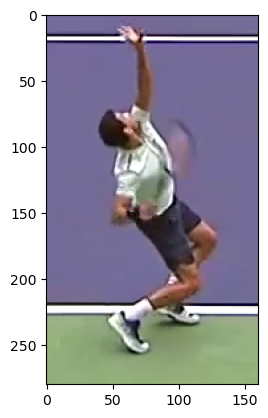

In [5]:
crop_img = image_processor.crop_image(frames_vid[29], 980, 1140, 595, 875)
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
plt.imshow(crop_img)

In [6]:
vid_obj.crop_shadow_player_save(0, 30, 980, 1140, 595, 875, 'img/dimitrov_service')

In [26]:
# Djokovic backhand
vid_obj = Video.read_video("dataset/rv_j2/cut3_bGZj9IUw.mp4")
frames_vid = vid_obj.frames

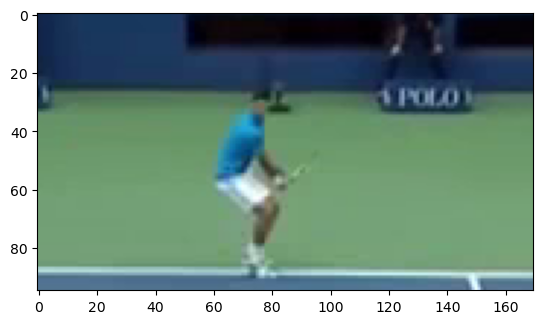

In [35]:
crop_img = image_processor.crop_image(frames_vid[0], 690, 860, 65, 160)
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
plt.imshow(crop_img)

In [36]:
vid_obj.crop_shadow_player_save(0, 30, 690, 860, 65, 160, 'img/djokovic_backhand')

In [23]:
# Test crop image
for frame in frames_vid:
    crop_img = image_processor.crop_image(frame, 998, 1112, 612, 860)
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    no_bg_img = image_processor.remove_background(gray_img, threshold=1.1)
    _, thresh = cv2.threshold(no_bg_img, 0, 255, cv2.THRESH_BINARY)
    cv2.imwrite("img/thresh_img.jpg", thresh)
    break

In [10]:
image_processor.save_img(crop_img, 'img/frame0-crop-test.jpg')

In [23]:
# Color to black and white image
no_color_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
no_color_img.shape

(246, 114)

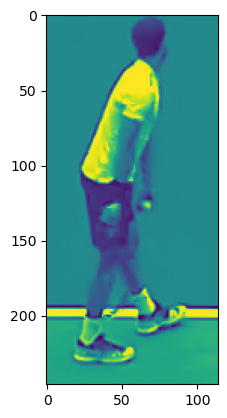

In [24]:
plt.imshow(no_color_img)

In [25]:
# Test remove background
no_bg_img = image_processor.remove_background('img/frame0-crop-no-color.jpg')

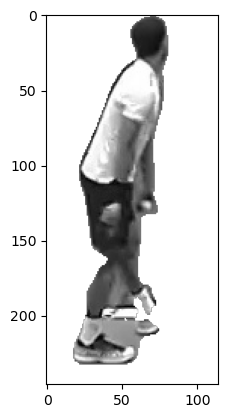

In [26]:
plt.imshow(no_bg_img)

In [13]:
def save_video(frame, saving_file_name, fps=30):
    i_height, i_width, _ = frame.shape
    process = (
        ffmpeg
        .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(i_width, i_height))
        .output(saving_file_name, pix_fmt='yuv420p', vcodec='libx264', r=fps)
        .overwrite_output()
        .run_async(pipe_stdin=True)
    )

    return process


In [14]:
saved_video_file_name = 'video_output/video_output4.mp4'
cap = cv2.VideoCapture()
process = save_video(frames_vid[0], saved_video_file_name)

for i, frame in enumerate(frames_vid):
    process.stdin.write(
    cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            .astype(np.uint8)
            .tobytes()
            )
    
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    # else:
    #     process.stdin.close()
    #     process.wait()
    #     cap.release()
    #     break

process.stdin.close()
process.wait()
cap.release()

In [6]:
new_vid = Video.read_video("video_output/djo_service.mp4")
print("The video has {} frames".format(len(new_vid.frames)))

The video has 76 frames
